In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
# from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
company=pd.read_csv("C:\Games\Bhag Milkha Bhag 2013 Hindi MC DVDScr Xvid AC3 IcTv\Desktop\CSV\Company_Data.csv")

In [3]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
company1=pd.get_dummies(company,columns=['Urban','US','ShelveLoc'])

In [6]:
company1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,42,17,0,1,0,1,1,0,0
1,11.22,111,48,16,260,83,65,10,0,1,0,1,0,1,0
2,10.06,113,35,10,269,80,59,12,0,1,0,1,0,0,1
3,7.40,117,100,4,466,97,55,14,0,1,0,1,0,0,1
4,4.15,141,64,3,340,128,38,13,0,1,1,0,1,0,0


In [7]:
company1["NewSale"]="<=7.490000"
company1.loc[company1["Sales"]>=7.490000,"NewSale"]="HIGH"
company1.loc[company1["Sales"]<=7.490000,"NewSale"]="LOW"


In [8]:
company1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,NewSale
0,9.50,138,73,11,276,120,42,17,0,1,0,1,1,0,0,HIGH
1,11.22,111,48,16,260,83,65,10,0,1,0,1,0,1,0,HIGH
2,10.06,113,35,10,269,80,59,12,0,1,0,1,0,0,1,HIGH
3,7.40,117,100,4,466,97,55,14,0,1,0,1,0,0,1,LOW
4,4.15,141,64,3,340,128,38,13,0,1,1,0,1,0,0,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,1,0,1,0,HIGH
396,6.14,139,23,3,37,120,55,11,1,0,0,1,0,0,1,LOW
397,7.41,162,26,12,368,159,40,18,0,1,0,1,0,0,1,LOW
398,5.94,100,79,7,284,95,50,12,0,1,0,1,1,0,0,LOW


In [9]:
company11=company1.drop('Sales',axis=1)

In [11]:
company11.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,NewSale
0,138,73,11,276,120,42,17,0,1,0,1,1,0,0,HIGH
1,111,48,16,260,83,65,10,0,1,0,1,0,1,0,HIGH
2,113,35,10,269,80,59,12,0,1,0,1,0,0,1,HIGH
3,117,100,4,466,97,55,14,0,1,0,1,0,0,1,LOW
4,141,64,3,340,128,38,13,0,1,1,0,1,0,0,LOW


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
labelencoder = LabelEncoder()

In [14]:
company11.iloc[:,14] = labelencoder.fit_transform(company11.iloc[:,14])

In [15]:
company11

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,NewSale
0,138,73,11,276,120,42,17,0,1,0,1,1,0,0,0
1,111,48,16,260,83,65,10,0,1,0,1,0,1,0,0
2,113,35,10,269,80,59,12,0,1,0,1,0,0,1,0
3,117,100,4,466,97,55,14,0,1,0,1,0,0,1,1
4,141,64,3,340,128,38,13,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,1,0,1,0,0
396,139,23,3,37,120,55,11,1,0,0,1,0,0,1,1
397,162,26,12,368,159,40,18,0,1,0,1,0,0,1,1
398,100,79,7,284,95,50,12,0,1,0,1,1,0,0,1


In [24]:
X = company11.iloc[:,0:14]
Y = company11.iloc[:,14]

In [26]:
Y

0      0
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    0
Name: NewSale, Length: 400, dtype: int32

In [25]:
X

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,138,73,11,276,120,42,17,0,1,0,1,1,0,0
1,111,48,16,260,83,65,10,0,1,0,1,0,1,0
2,113,35,10,269,80,59,12,0,1,0,1,0,0,1
3,117,100,4,466,97,55,14,0,1,0,1,0,0,1
4,141,64,3,340,128,38,13,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,1,0,1,0
396,139,23,3,37,120,55,11,1,0,0,1,0,0,1
397,162,26,12,368,159,40,18,0,1,0,1,0,0,1
398,100,79,7,284,95,50,12,0,1,0,1,1,0,0


In [27]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=40)

In [28]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

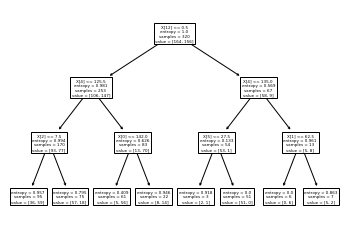

In [29]:
tree.plot_tree(model);

In [30]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    51
0    29
dtype: int64

In [31]:
preds

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0])

In [32]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
NewSale,,
0,20,15
1,9,36


In [33]:
# Accuracy 
np.mean(preds==y_test)

0.7

In [34]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [35]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [38]:
#Prediction and computing the accuracy
pred=model_gini.predict(x_test)
np.mean(preds==y_test)

0.7